In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
pd.set_option("display.max_columns",300)
from functools import partial
from tabulate import tabulate as t

In [6]:
# this data was aquired using the get_pitchfx.ipynb and parse_xml.ipynb notebooks and then pickled
df = pd.read_pickle("meadows_thru_20190718.pkl")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 32844
Data columns (total 43 columns):
atbat_result       1431 non-null object
ax                 1336 non-null float64
ay                 1336 non-null float64
az                 1336 non-null float64
batter             1431 non-null int64
break_angle        1336 non-null float64
break_length       1336 non-null float64
break_y            1336 non-null float64
cc                 0 non-null float64
code               1431 non-null object
des                1431 non-null object
des_es             1431 non-null object
end_speed          1336 non-null float64
event_num          1431 non-null int64
id                 1431 non-null int64
mt                 0 non-null float64
nasty              0 non-null float64
pfx_x              1336 non-null float64
pfx_z              1336 non-null float64
pitch_type         1336 non-null object
pitcher            1431 non-null int64
play_guid          1336 non-null object
px           

In [8]:
conv_dt = partial(pd.to_datetime, format="%Y-%m-%dT%H:%M:%S.%fZ")
df["time"] = df.tfs_zulu.apply(conv_dt)

In [9]:
df.head()

,atbat_result,ax,ay,az,batter,break_angle,break_length,break_y,cc,code,des,des_es,end_speed,event_num,id,mt,nasty,pfx_x,pfx_z,pitch_type,pitcher,play_guid,px,pz,spin_dir,spin_rate,start_speed,sv_id,sz_bot,sz_top,tfs,tfs_zulu,type,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,zone,time
0,Flyout,-18.14,25.67,-25.86,640457,32.4,7.2,24.0,NaN,B,Ball,"In play, out(s)",83.8,2,2,NaN,NaN,-10.15,3.53,FT,519144,beda73fc-8d1d-4303-9ce4-579c11b31816,-0.93,3.47,placeholder,placeholder,90.9,190607_231050,1.58,3.42,231045,2019-06-07T23:10:45.000Z,B,placeholder,6.71,-132.22,-1.66,152.29,-2.16,145.27,50.0,5.98,placeholder,2019-06-07 23:10:45
1,Flyout,-11.49,25.24,-17.76,640457,28.8,4.8,24.0,NaN,C,Called Strike,Ball,84.1,3,3,NaN,NaN,-6.39,8.03,FF,519144,25368d67-865c-493d-a494-7d38c66372df,-0.64,2.79,placeholder,placeholder,91.1,190607_231104,1.66,3.48,231058,2019-06-07T23:10:58.000Z,S,placeholder,5.94,-132.43,-4.78,141.57,-2.07,163.43,50.0,5.90,placeholder,2019-06-07 23:10:58
2,Flyout,-11.34,27.90,-16.18,640457,31.2,4.8,24.0,NaN,B,Ball,Called Strike,83.4,4,4,NaN,NaN,-6.35,8.95,FF,519144,079bcb5f-a5c6-408d-b96f-bbee5b2d1c35,-0.25,4.18,placeholder,placeholder,91.2,190607_231118,1.61,3.47,231113,2019-06-07T23:11:13.000Z,B,placeholder,5.93,-132.68,-2.23,126.69,-1.69,125.97,50.0,6.21,placeholder,2019-06-07 23:11:13
3,Flyout,-18.08,28.25,-27.16,640457,30.0,7.2,24.0,NaN,X,"In play, out(s)",Ball,82.8,5,5,NaN,NaN,-10.34,2.87,FT,519144,2aab16a9-5ee2-4b16-9496-a1973b97d621,0.31,2.35,placeholder,placeholder,90.6,190607_231144,1.58,3.41,231129,2019-06-07T23:11:29.000Z,X,placeholder,9.48,-131.47,-3.48,105.16,-2.00,175.36,50.0,5.71,placeholder,2019-06-07 23:11:29
55,Groundout,-19.33,26.86,-25.55,640457,33.6,7.2,24.0,NaN,F,Foul,"In play, out(s)",83.8,88,88,NaN,NaN,-10.84,3.72,FT,519144,a7223df8-4e25-4772-a724-5777ab099a97,-0.48,2.40,placeholder,placeholder,91.0,190607_234001,1.58,3.41,233956,2019-06-07T23:39:56.000Z,S,placeholder,7.39,-132.35,-4.44,135.24,-1.89,173.96,50.0,5.96,placeholder,2019-06-07 23:39:56


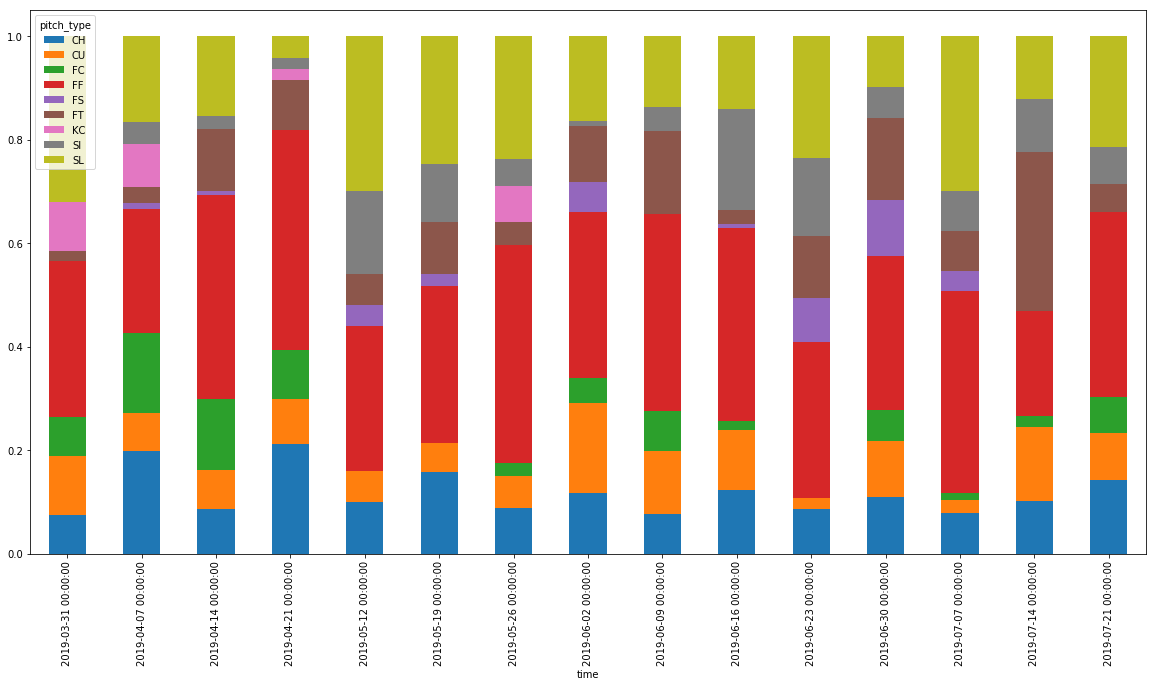

In [10]:
df.set_index("time").groupby([pd.Grouper(freq="W"),"pitch_type"]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind="bar",stacked=True,figsize=(20,10))

In [11]:
df = df.query("time >= '3/28/2019' and time <='7/5/2019'").sort_values("time")

In [12]:
df["game"] = df.time.dt.date.rank(method="dense")

In [13]:
stat = pd.read_html("http://widgets.sports-reference.com/wg.fcgi?css=1&site=br&url=%2Fplayers%2Fgl.fcgi%3Fid%3Dmeadoau01%26t%3Db%26year%3D2019&div=div_batting_gamelogs")[0].query("Opp != 'Opp'").iloc[:-1]

In [14]:
stat["home"] = stat["Unnamed: 5"].isna()
to_num = partial(pd.to_numeric,errors='ignore')
stat = stat.apply(to_num)
stat["game"] = stat.Rk

In [15]:
stat = stat.query("game <= 71")

(0.28, 0.4)

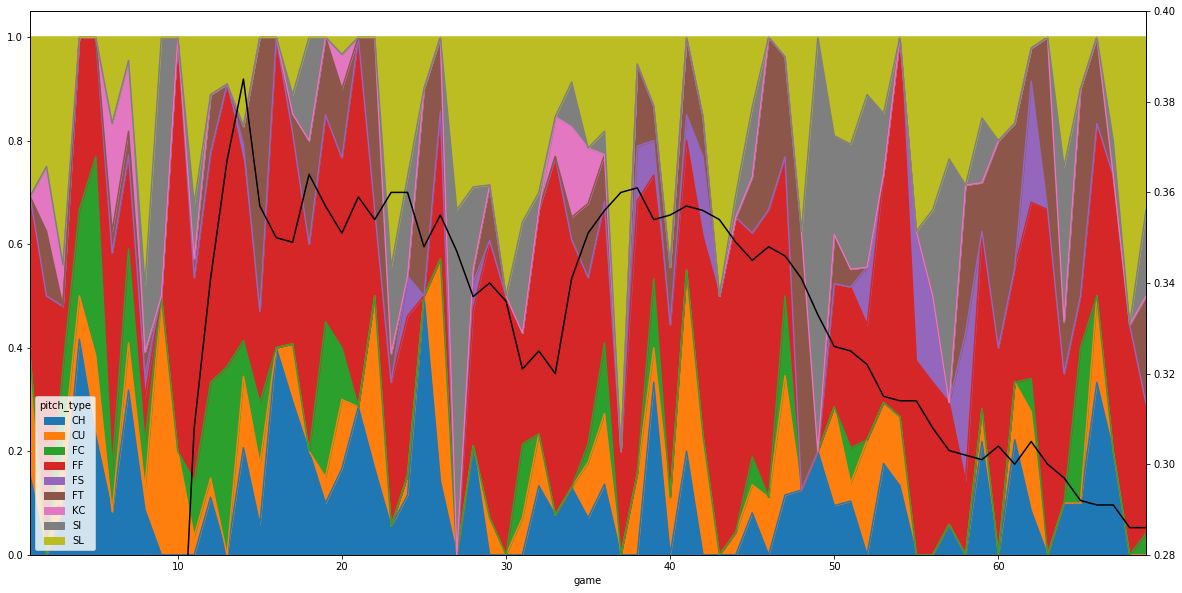

In [16]:
ax = df.groupby(["game","pitch_type"]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind="area",stacked=True,figsize=(20,10))
ax2 = ax.twinx()
ax2.plot(stat["game"], stat["BA"], label="BA", color="black")
ax2.set_ylim(.28,.40)


In [17]:
from collections import defaultdict

sim_pit_map = defaultdict(lambda: 'fastball')

sim_pit_map["SL"] = 'breaking ball'
sim_pit_map["CH"] = 'changeup'
sim_pit_map["CB"] = 'breaking ball'
sim_pit_map["CU"] = 'breaking ball'
sim_pit_map["KC"] = 'breaking ball'
sim_pit_map["KN"] = 'knuckleball'
sim_pit_map["EP"] = 'eephus'

In [18]:
sim_result = defaultdict(lambda: "other_out")
sim_result["Walk"] = "walk"
sim_result["Double"] = "hit"
sim_result["Hit By Pitch"] = "other"
sim_result["Field Error"] = "other"
sim_result["Intent Walk"] = "walk"
sim_result["Single"] = "hit"
sim_result["Triple"] = "hit"
sim_result["Strikeout"] = "strikeout"


In [19]:
df["sim_pitch"] = df.pitch_type.map(sim_pit_map)
df["sim_result"] = df.atbat_result.map(sim_result)

In [21]:
p_day = 43
df["slump"] = df["game"] > p_day

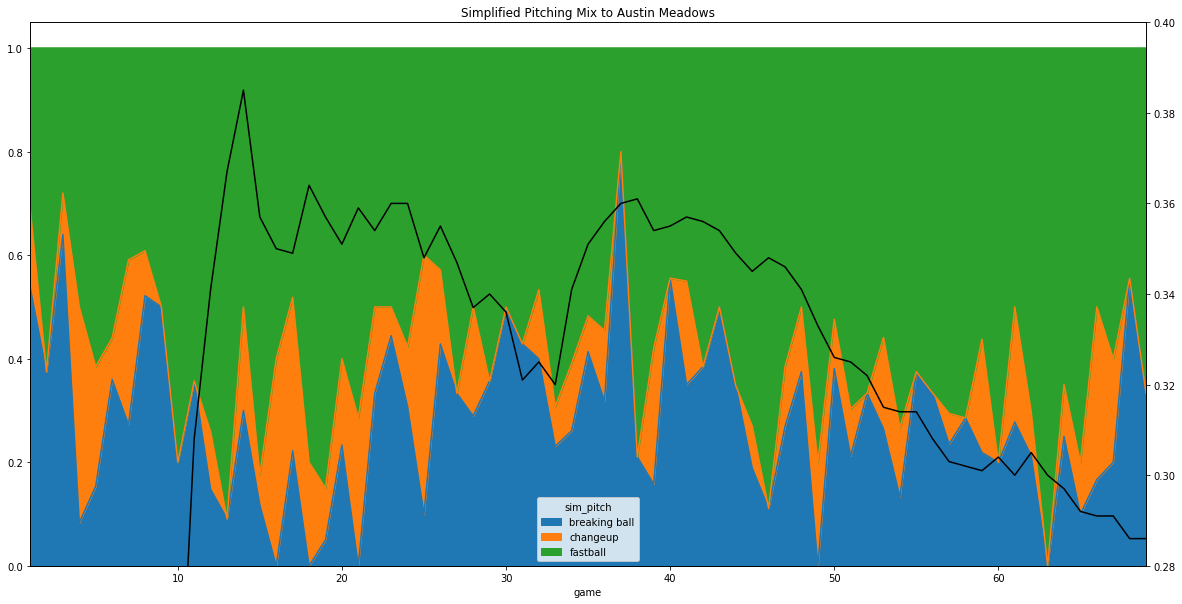

In [201]:
ax = df.groupby(["game","sim_pitch"]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind="area",stacked=True,figsize=(20,10), title="Simplified Pitching Mix to Austin Meadows")
ax2 = ax.twinx()
ax2.plot(stat["game"], stat["BA"], label="BA", color="black")
ax2.set_ylim(.28,.40)
plt.savefig("simple pitch mix.png")

In [25]:
df.query("sim_result != 'other'").groupby(["sim_result","sim_pitch"]).size().unstack()

sim_pitch,breaking ball,changeup,fastball
sim_result,,,
hit,63,21,155
other_out,141,72,274
strikeout,100,34,210
walk,36,12,81


In [27]:
#average game total in two week
pd.DatetimeIndex(df.time.dt.date.drop_duplicates()).to_series().resample('2W').count().mean()

8.625

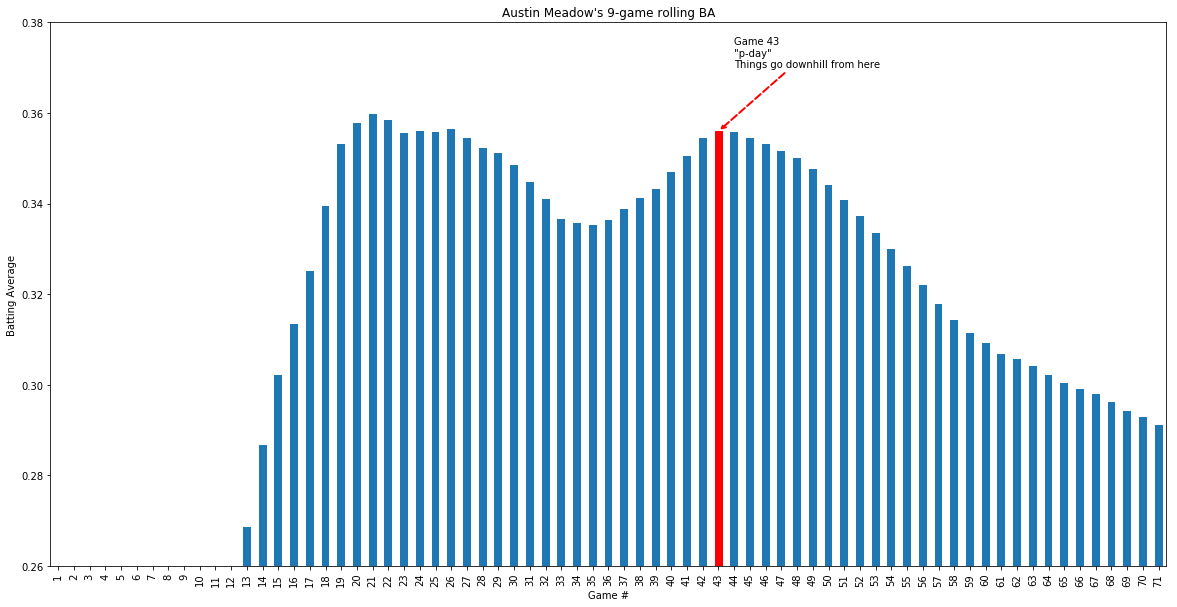

In [199]:
# 9 game rolliing avg
ax = stat.set_index("Rk").BA.rolling(9).mean().plot(kind="bar",figsize=(20,10), ylim=(.26,.38), title="Austin Meadow's 9-game rolling BA")
ax.get_children()[42].set_color('r')
ax.set_ylabel("Batting Average")
ax.set_xlabel("Game #")
ax.annotate("Game 43\n\"p-day\"\nThings go downhill from here",
            xy=(42, .356),
            xytext=(43, .37),
            arrowprops=dict(arrowstyle='->',
                            color='red',
                            lw=2,
                            ls='--'))
plt.savefig("Austin 9-game rolling BA.png")

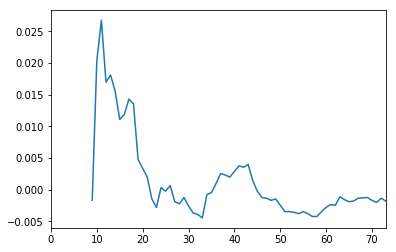

In [29]:
stat.BA.rolling(9).mean().diff(1).plot()

In [170]:
spans = dict(
    pre_p_day = "game <= 43",
    post_p_day = "game > 43",
    minislump = "game > 23 and game <= 33"
)

In [168]:
def get_slash_line(df):
    t = df.copy()
#     print(t.game)
    t["1B"] = t.apply(lambda r: r.H - (r["2B"] + r["3B"] + r["HR"]), axis=1)
    # BA -- Hits/At Bats
    ba = t.H.sum()/t.AB.sum()
    # OBP -- (H + BB + HBP)/(At Bats + BB + HBP + SF)
    obp = (t.H.sum() + t.BB.sum() + t.HBP.sum())/(t.AB.sum()+t.BB.sum()+t.HBP.sum()+t.SF.sum())
    # SLG -- Total Bases/At Bats or (1B + 2*2B + 3*3B + 4*HR)/AB
    slg = (t["1B"].sum() + (t["2B"].sum() * 2) + (t["3B"].sum() * 3) + (t.HR.sum() * 4))/ t.AB.sum()
    return [ str(round(x,3)) for x in [ba, obp, slg]]

In [177]:
def pretty_print(df):
    temp = df.query(q).sim_pitch.value_counts(normalize=True).apply(lambda x: round(x,2))
    values, columns= temp.round(2).reset_index(), temp.reset_index().columns
    print(t(values,columns,tablefmt="pipe"))

In [171]:
# slash lines
for span, q in spans.items():
    print(f"Slash line durring {span}:", "/".join(get_slash_line(stat.query(q))))

Slash line durring pre_p_day: 0.354/0.43/0.659
Slash line durring post_p_day: 0.193/0.261/0.266
Slash line durring minislump: 0.222/0.333/0.361


In [180]:
for span, q in spans.items():
    print(f"{span}")
    pretty_print(df.query(q))

pre_p_day
|    | index         |   sim_pitch |
|---:|:--------------|------------:|
|  0 | fastball      |        0.56 |
|  1 | breaking ball |        0.31 |
|  2 | changeup      |        0.13 |
post_p_day
|    | index         |   sim_pitch |
|---:|:--------------|------------:|
|  0 | fastball      |        0.65 |
|  1 | breaking ball |        0.25 |
|  2 | changeup      |        0.1  |
minislump
|    | index         |   sim_pitch |
|---:|:--------------|------------:|
|  0 | fastball      |        0.54 |
|  1 | breaking ball |        0.33 |
|  2 | changeup      |        0.12 |


In [182]:
df.sim_pitch.value_counts(normalize=True).apply(lambda x: round(x,2))

fastball         0.60
breaking ball    0.28
changeup         0.12
Name: sim_pitch, dtype: float64

In [322]:
# the pitching mix isn't all that different. If anything Austin has seen less change ups after p-day

In [84]:
# round2 = partial(round, 2.0)
pre_pitch_mix = df.query(pre_p_day).sim_pitch.value_counts() / 43
values, columns= pre_pitch_mix.round(2).reset_index(), pre_pitch_mix.reset_index().columns
print(t(values,columns,tablefmt="pipe"))

|    | index         |   sim_pitch |
|---:|:--------------|------------:|
|  0 | fastball      |        9.37 |
|  1 | breaking ball |        5.14 |
|  2 | changeup      |        2.19 |


In [78]:
post_pitch_mix = df.query(post_p_day).sim_pitch.value_counts()/ 28
values, columns= post_pitch_mix.round(2).reset_index(), post_pitch_mix.reset_index().columns
print(t(values,columns,tablefmt="pipe"))

|    | index         |   sim_pitch |
|---:|:--------------|------------:|
|  0 | fastball      |       11.5  |
|  1 | breaking ball |        4.43 |
|  2 | changeup      |        1.71 |


In [203]:
stat.query(post_p_day).shape

(28, 40)

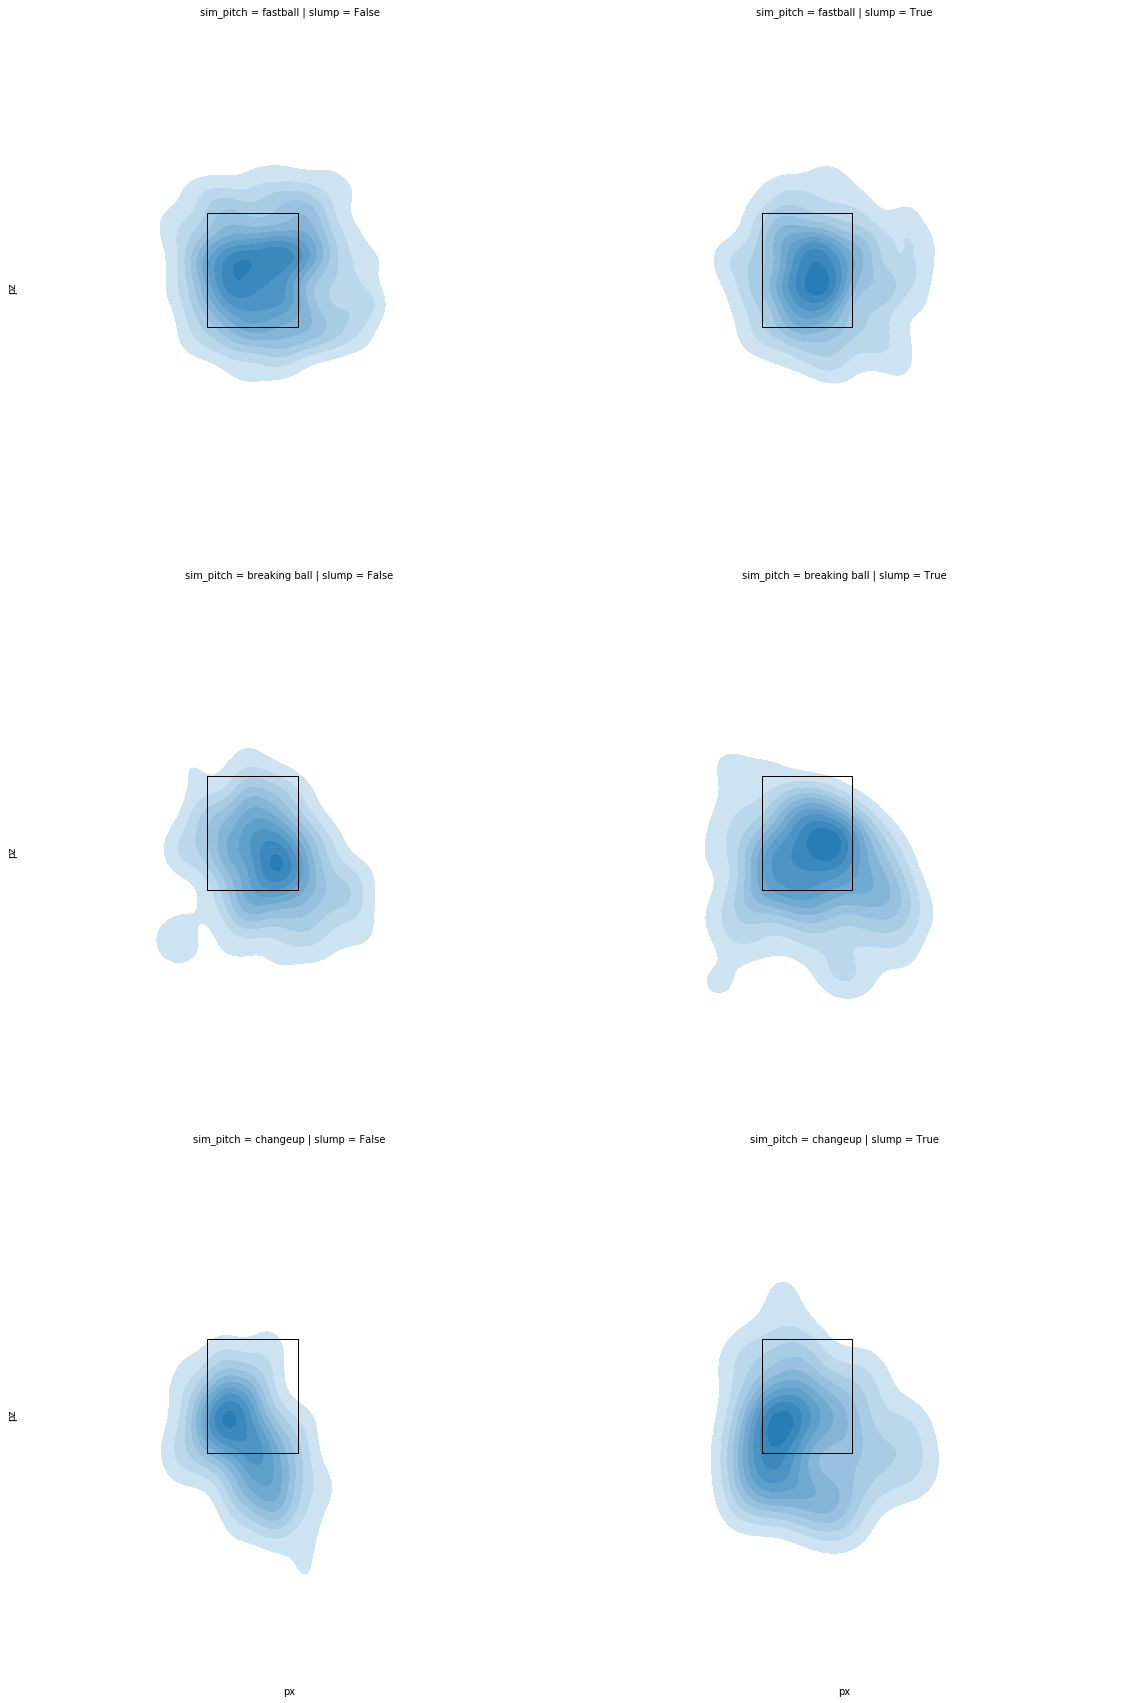

In [202]:
g = sns.FacetGrid(df,row="sim_pitch", col="slump", height=8)
g.map(sns.kdeplot,'px','pz',shade=True,shade_lowest=False)
for ax in g.axes.flat:
    strike_zone = Rectangle((-1.2,1.6),1.5,2,edgecolor='k',facecolor='none')
    sns.despine(ax=ax,left=True,bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.add_patch(strike_zone)
    
plt.savefig("pitching locations.png")

In [124]:
# balls put into play
inplay_event_codes = ["D","E","X"]
df.groupby(["code","des"]).size()

code  des                      
*B    Ball In Dirt                  28
B     Ball                         421
C     Called Strike                235
D     In play, no out               47
E     In play, run(s)               27
F     Foul                         188
H     Hit By Pitch                   4
S     Swinging Strike              112
T     Foul Tip                      12
V     Automatic Ball                10
W     Swinging Strike (Blocked)      8
X     In play, out(s)              120
dtype: int64

In [99]:
inplay_events = df[df.code.isin(inplay_event_codes)]

In [106]:
# number of balls put into play - pre p-day
inplay_events.query(pre_p_day).shape[0] / 43

2.744186046511628

In [107]:
# number of balls put into play - post p-day
inplay_events.query(post_p_day).shape[0] / 28

2.7142857142857144

In [138]:
def babip(df):
    t = df.copy()
    # (hits - homeruns)/ (AB-SO-HR+SF)
    return round((t.H.sum() - t.HR.sum()) / (t.AB.sum()-t.SO.sum()-t.HR.sum()+t.SF.sum()),3)

In [183]:
for span, q in spans.items():
    print(f"BABIP during {span}", babip(stat.query(q)))

BABIP during pre_p_day 0.397
BABIP during post_p_day 0.288
BABIP during minislump 0.292
